# Libraries


In [ ]:

import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
from scipy.stats import skew


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read and Understand Data

In [ ]:
#Reading the csv file AxisInsurance.csv
df = pd.read_csv('/content/drive/MyDrive/Data science dataset/insurance.csv')
insured=df.copy()

In [ ]:
# inspect data, print top 5
insured.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
# bottom 5 rows:
insured.tail(5)

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
insured.info()    #it give information about datatype of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
print(insured.shape)
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])


(1338, 7)
Rows     :  1338
Columns  :  7


In [ ]:
insured.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
insured.isnull().sum().values.sum()

0

In [ ]:
# insured[insured['Gender'] == '']

In [ ]:
insured = insured.dropna()    #drops empty or NAN value

In [ ]:
insured.shape

(1338, 7)

In [ ]:
insured.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
print ("\nValues : \n", insured.values)
print ("\nFeatures : \n", list(insured.columns))



Values : 
 [[19 'female' 27.9 ... 'yes' 'southwest' 16884.92]
 [18 'male' 33.8 ... 'no' 'southeast' 1725.55]
 [28 'male' 33.0 ... 'no' 'southeast' 4449.46]
 ...
 [18 'female' 36.9 ... 'no' 'southeast' 1629.83]
 [21 'female' 25.8 ... 'no' 'southwest' 2007.95]
 [61 'female' 29.1 ... 'yes' 'northwest' 29141.36]]

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']


In [ ]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#changing object dtype to category  to save memory
insured['sex']=insured['sex'].astype("category")
insured['smoker']=insured['smoker'].astype("category")
insured['region']=insured['region'].astype("category")


In [ ]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [ ]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
#EDA

In [ ]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
list_col


Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
# get counts of unique observations for each category variable
list_col1=  insured.select_dtypes(['int']).columns
list_col1


Index(['age', 'children'], dtype='object')

In [ ]:
# get counts of unique observations for each category variable
list_col2=  insured.select_dtypes(['float']).columns
list_col2


Index(['bmi', 'expenses'], dtype='object')

In [ ]:
# Value Count

In [ ]:
cat = set(insured['sex'])
male_no = len(insured[insured['sex'] == 'male'])
female_no = len(insured[insured['sex'] == 'female'])
print(male_no)
print(female_no)


676
662


In [ ]:
insured['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
insured['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
insured['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
for i in list_col:
  print(i)

sex
smoker
region


In [ ]:
for i in list_col:
  print(dict(insured[i].value_counts()))

{'male': 676, 'female': 662}
{'no': 1064, 'yes': 274}
{'southeast': 364, 'northwest': 325, 'southwest': 325, 'northeast': 324}


In [ ]:
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# # Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

In [ ]:
len(insured[insured['sex'] == 'female'])

662

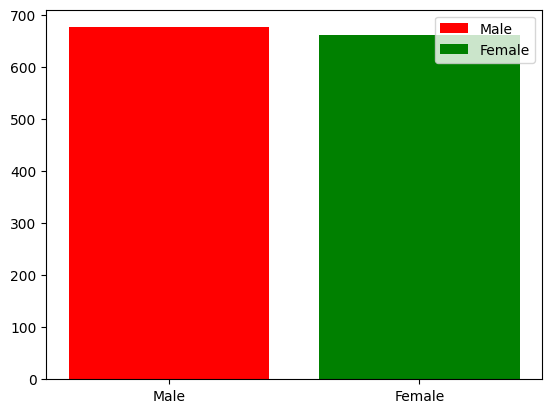

In [ ]:
no_of_male = len(insured[insured['sex'] == 'male'])
no_of_female = len(insured[insured['sex'] == 'female'])

plt.bar(['Male','Female'],[no_of_male,no_of_female],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

In [ ]:
plot_data = dict(insured['sex'].value_counts())
print(plot_data)
no_of_male = plot_data['male']
no_of_female = plot_data['female']
print(no_of_male,no_of_female)

{'male': 676, 'female': 662}
676 662


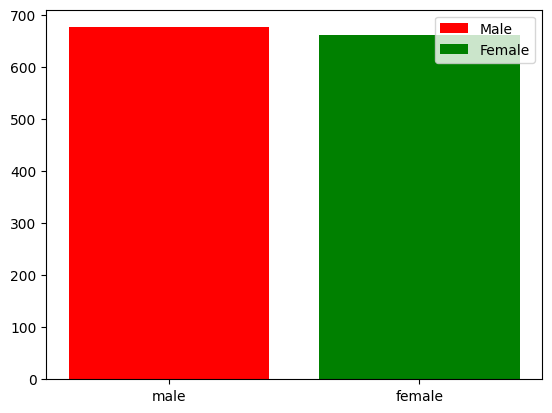

In [ ]:
plot_data = dict(insured['sex'].value_counts())
plot_data
plt.bar(['male','female'],[plot_data['male'],plot_data['female']],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

<Axes: >

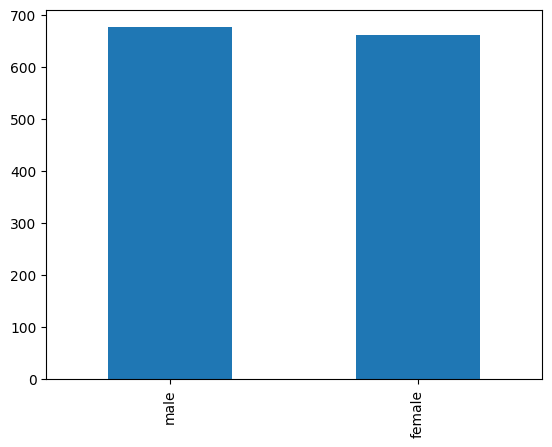

In [ ]:
insured['sex'].value_counts().plot.bar()

<Axes: >

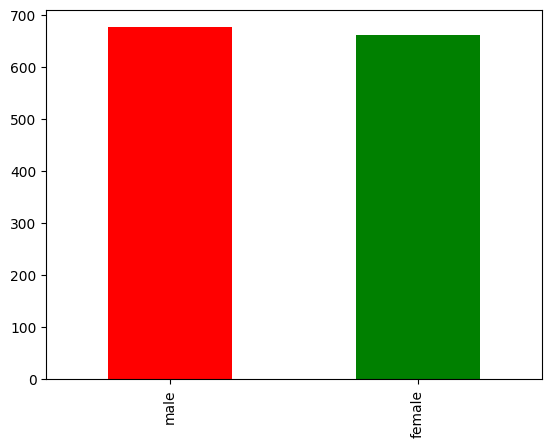

In [ ]:
insured['sex'].value_counts().plot.bar(color = ['r','g'])    #plot.bar is for contructing bars

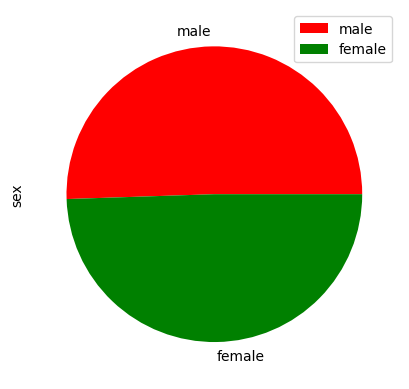

In [ ]:
insured['sex'].value_counts().plot.pie(colors=['r','g'])
plt.legend()

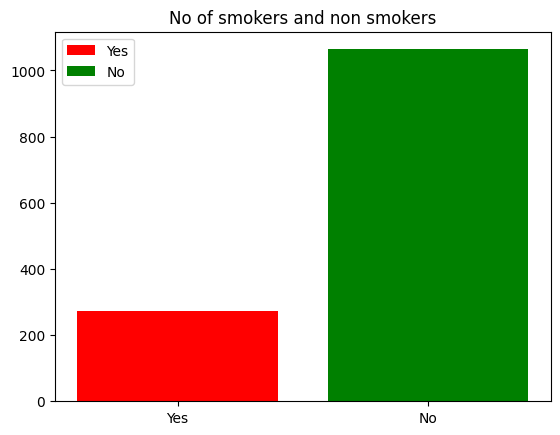

In [ ]:
#Alternet
#for education level
no_of_yes = len(insured[insured['smoker'] == "yes"])
no_of_no = len(insured[insured['smoker'] == "no"])

plt.bar(["Yes","No"],[no_of_yes,no_of_no], color = ['r','g'], label=["Yes","No"])
plt.title('No of smokers and non smokers')
plt.legend()
plt.show()

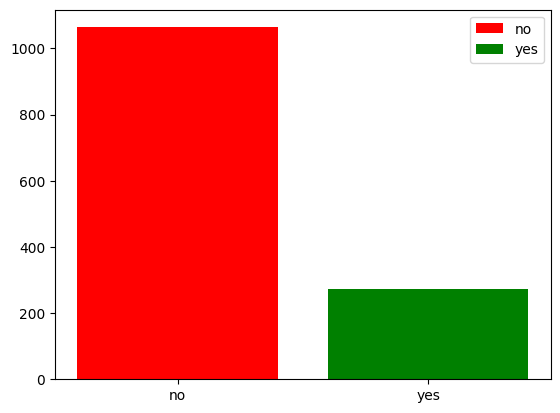

dict_keys(['no', 'yes'])

In [ ]:
plot_data = dict(insured['smoker'].value_counts())
plt.bar(plot_data.keys(),plot_data.values(),color = ['r','g'],label = plot_data.keys())
plt.legend()
plt.show()
plot_data
plot_data.keys()

<Axes: >

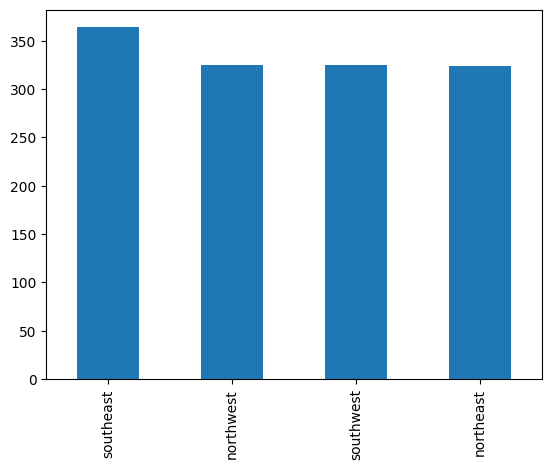

In [ ]:
insured['region'].value_counts().plot.bar()

In [ ]:
# Analyzing categorical data

In [ ]:
data = {}
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
  values = list(insured[list_col[i]].value_counts())
  subcategory = list(insured[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]

data

{'sex': [['male', 'female'], [676, 662]],
 'smoker': [['no', 'yes'], [1064, 274]],
 'region': [['southeast', 'northwest', 'southwest', 'northeast'],
  [364, 325, 325, 324]]}

In [ ]:
# Bar Graph

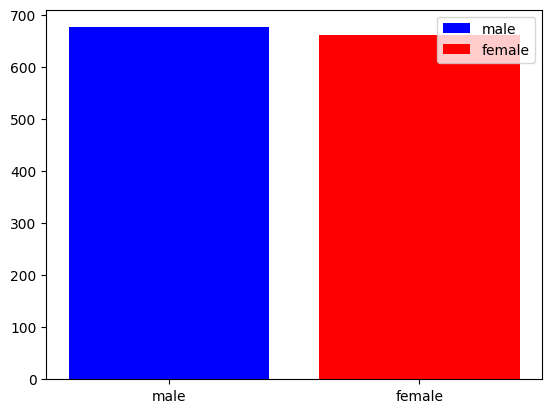

In [ ]:
plt.bar(data['sex'][0],data['sex'][1],label=data['sex'][0],
        color = ['b','r'])
plt.legend()
plt.show()

In [ ]:
# #Alternate
# print(data['region'])
# plt.bar(data['region'][0],data['region'][1],
#         label=['southeast', 'northwest', 'southwest', 'northeast'],
#         color = ['r','b','g','k'])
# plt.title('Region')
# plt.legend()
# plt.show()

## Bivariate & Multivariate Analysis

In [ ]:
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
corr_insured = insured[['age','children','bmi','expenses']]

In [ ]:
corr_insured.corr()

,age,children,bmi,expenses
age,1.000000,0.042469,0.109341,0.299008
children,0.042469,1.000000,0.012645,0.067998
bmi,0.109341,0.012645,1.000000,0.198576
expenses,0.299008,0.067998,0.198576,1.000000


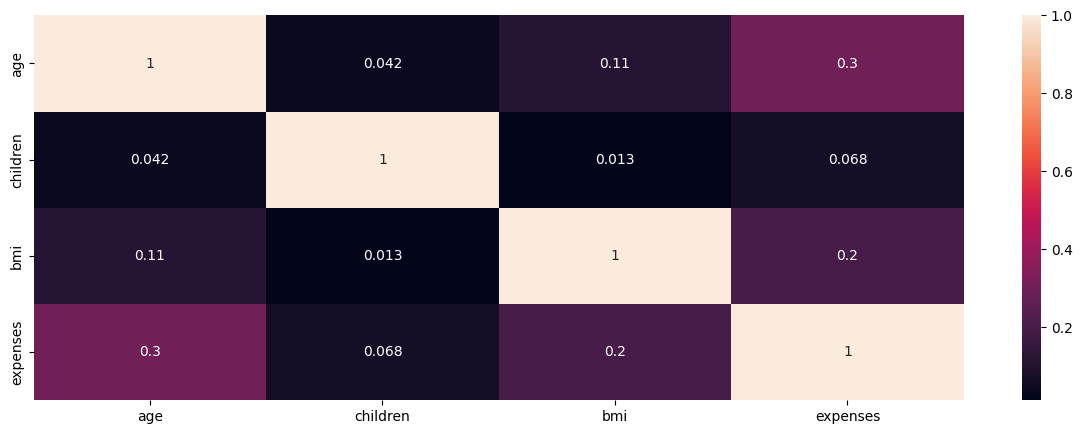

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_insured.corr(),annot=True)
plt.show()

<Figure size 500x500 with 0 Axes>

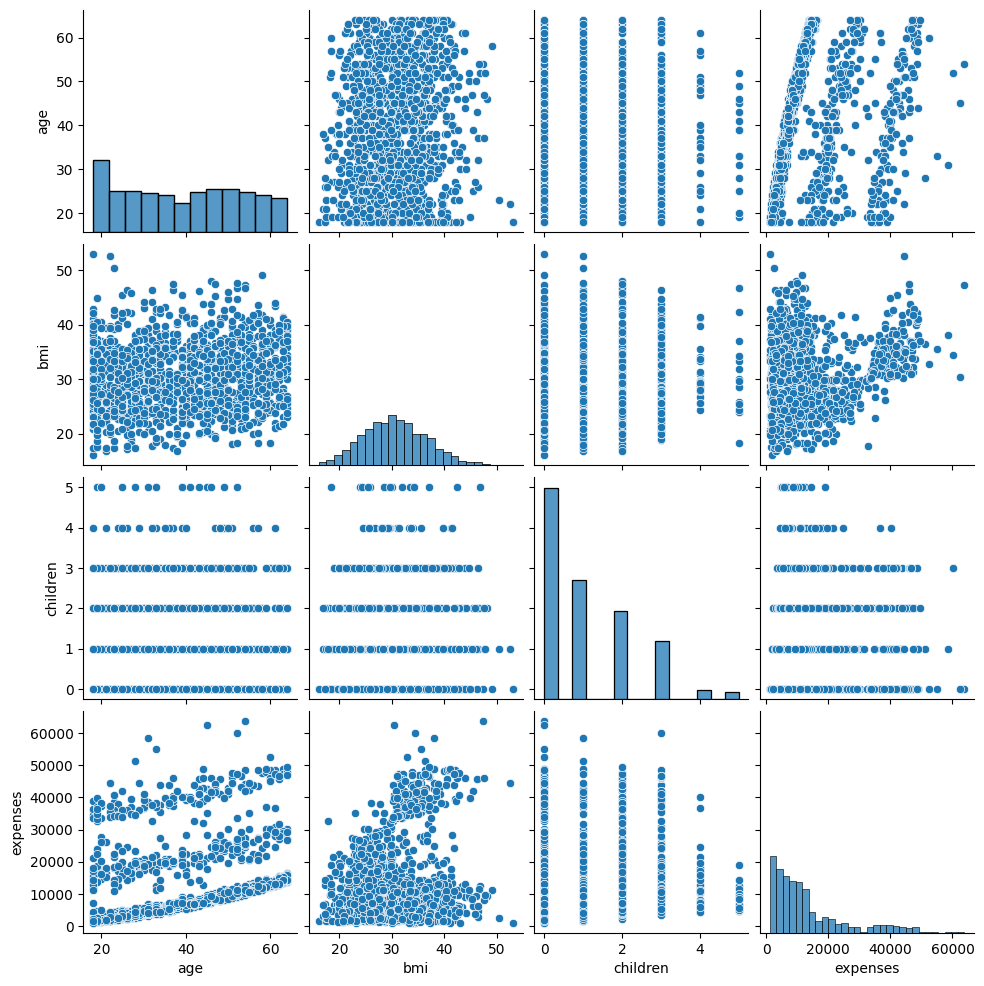

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(data=insured)
plt.show()

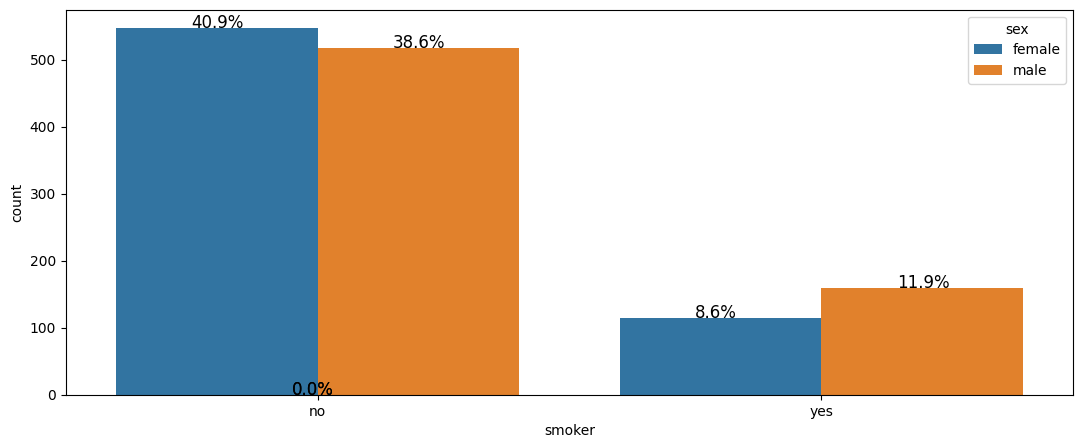

In [ ]:
#Gender count plot
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=insured)
bar_perc(ax,insured['smoker'])

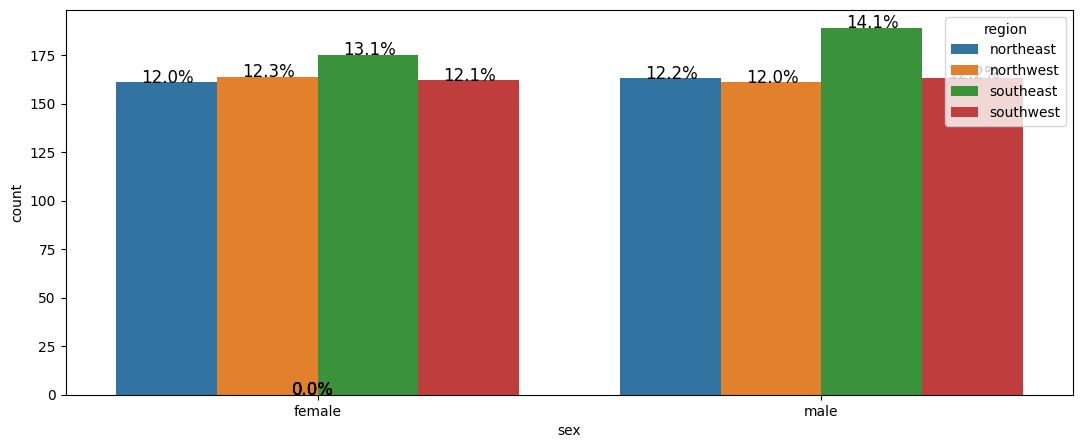

In [ ]:
#Sex vs region
plt.figure(figsize=(13,5))
ax=sns.countplot(x='sex',hue='region',data=insured)
bar_perc(ax,insured['region'])


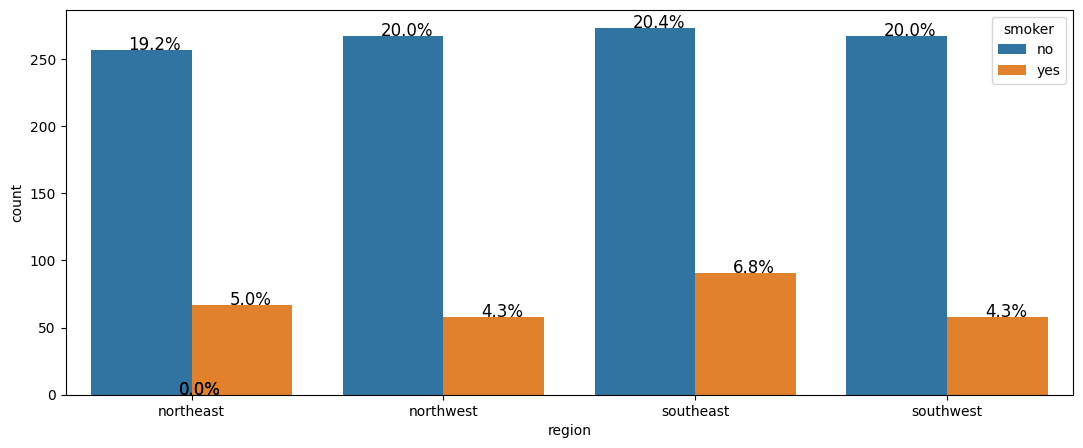

In [ ]:
#Region vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
bar_perc(ax,insured['region'])


[Text(0.5, 1.0, 'Smoker vs Expenses')]

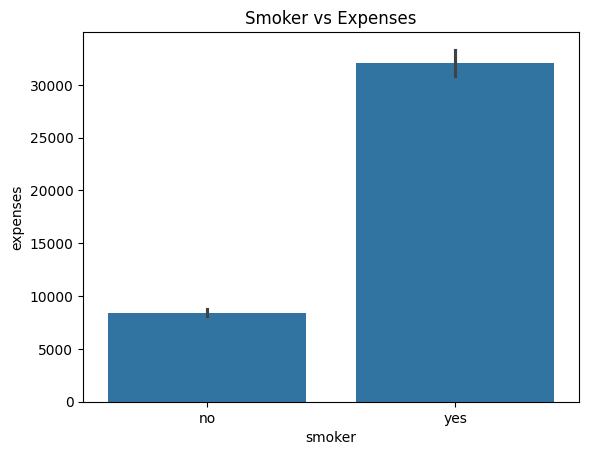

In [ ]:
# #smoker vs expenses
sns.barplot(x=insured.smoker,y=insured.expenses).set(title="Smoker vs Expenses")

[Text(0.5, 1.0, 'Smoker vs Region')]

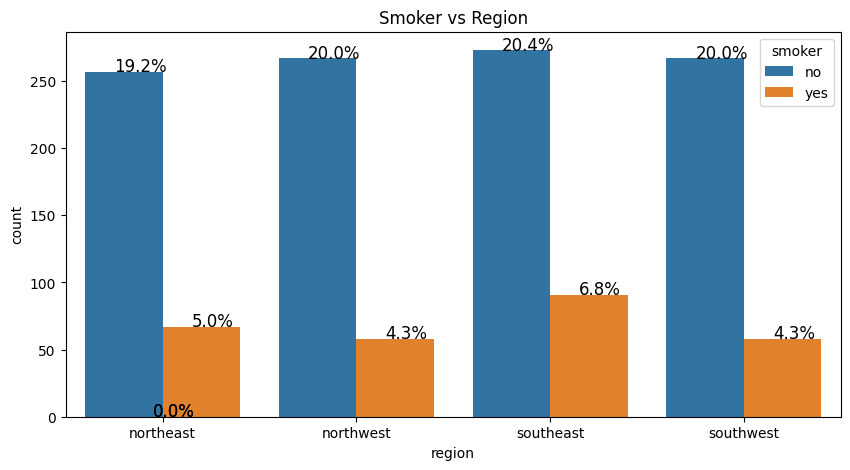

In [ ]:
#region vs smoker
plt.figure(figsize=(10,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
bar_perc(ax,insured['smoker'])
ax.set(title="Smoker vs Region")

In [ ]:
# #smoker vs region
# plt.figure(figsize=(10,5))
# ax=sns.countplot(x='smoker',hue='region',data=insured)
# bar_perc(ax,insured['region'])
# ax.set(title="Smoker vs Region")

[Text(0.5, 1.0, 'Sex vs Region')]

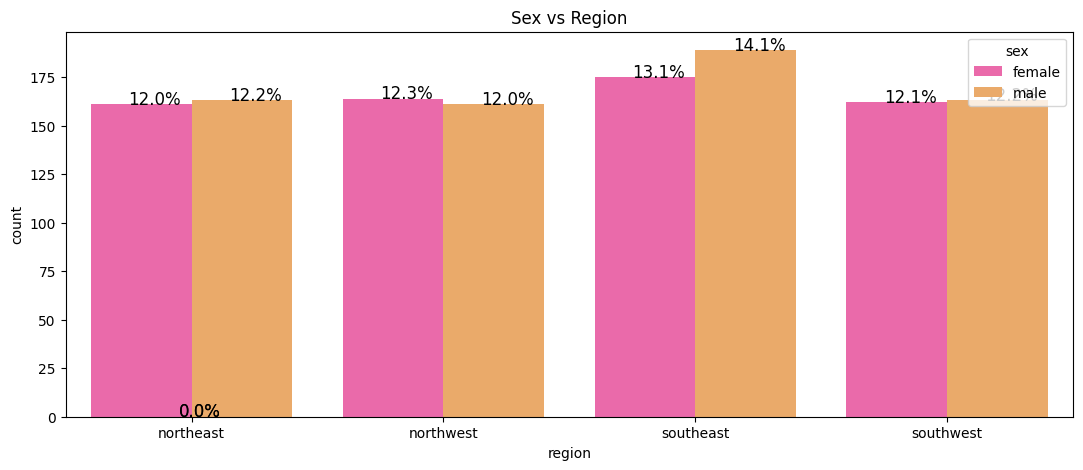

In [ ]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=insured,palette='spring')
bar_perc(ax,insured['sex'])
ax.set(title="Sex vs Region")

In [ ]:
insured.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
# GROUP BY

In [ ]:
insured.groupby(insured.sex).expenses.sum()

sex
female    8321061.23
male      9434763.96
Name: expenses, dtype: float64

In [ ]:
insured.groupby(insured.sex).expenses.mean()      #GROUP BY BY Gender

sex
female    12569.578897
male      13956.751420
Name: expenses, dtype: float64

In [ ]:
insured.groupby(insured.smoker).expenses.mean()

smoker
no      8434.268449
yes    32050.231971
Name: expenses, dtype: float64

In [ ]:
insured.groupby(insured['region']).expenses.mean()      #GROUP BY BY Region

region
northeast    13406.384691
northwest    12417.575169
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64

In [ ]:
type(insured.groupby(insured['region']).expenses.mean())

pandas.core.series.Series

In [ ]:
dict(insured.groupby(insured['region']).expenses.mean())

{'northeast': 13406.384691358024,
 'northwest': 12417.57516923077,
 'southeast': 14735.411538461538,
 'southwest': 12346.937907692307}

In [ ]:
plot_data = dict(insured.groupby(insured['region']).expenses.mean())
plot_key = list(plot_data.keys())
plot_value = list(plot_data.values())
print(plot_key)
print(plot_value)

['northeast', 'northwest', 'southeast', 'southwest']
[13406.384691358024, 12417.57516923077, 14735.411538461538, 12346.937907692307]


[Text(0.5, 1.0, 'Gender Vs Salary')]

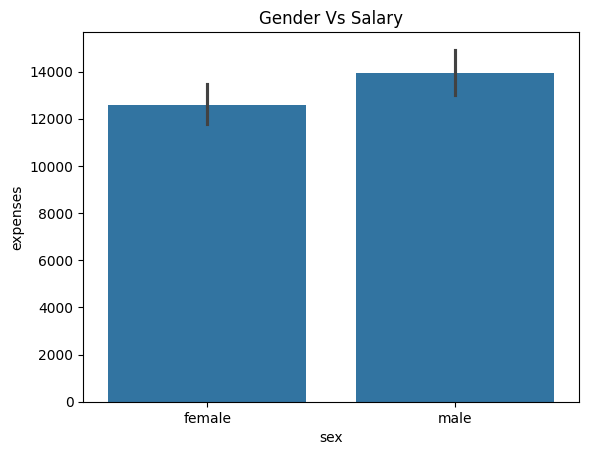

In [ ]:
#Plot of Gender and Salary
sns.barplot(x=insured.sex,y=insured.expenses).set(title='Gender Vs Salary')

<Axes: xlabel='sex'>

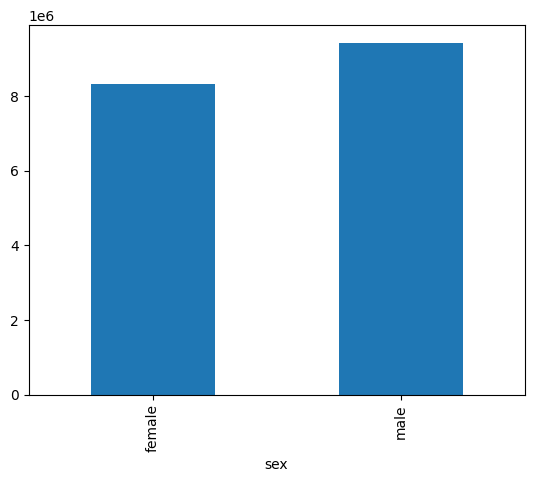

In [ ]:
insured.groupby(insured.sex).expenses.sum().plot.bar()

['female', 'male']
[12569.578897280968, 13956.751420118344]


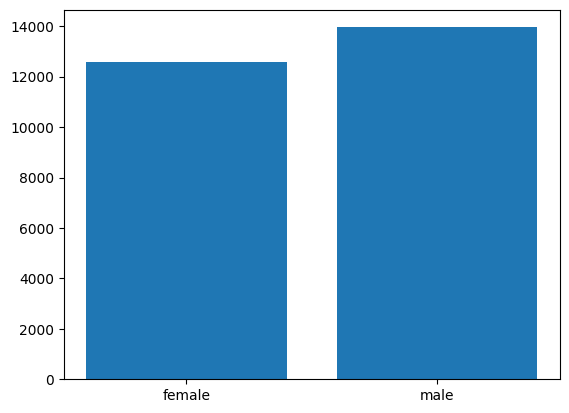

In [ ]:
plot_data = dict(insured.groupby(insured['sex']).expenses.mean())
plot_key = list(plot_data.keys())
plot_value = list(plot_data.values())
print(plot_key)
print(plot_value)
plt.bar(plot_key,plot_value)
plt.show()

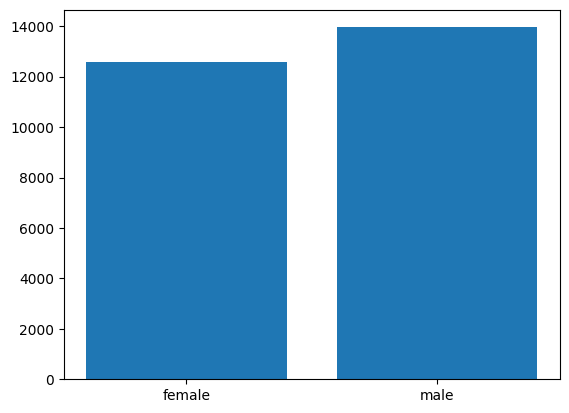

In [ ]:
plot_data = dict(insured.groupby(insured['sex']).expenses.mean())
plt.bar(list(plot_data.keys()),list(plot_data.values()))
plt.show()

[Text(0.5, 1.0, 'region Vs expenses')]

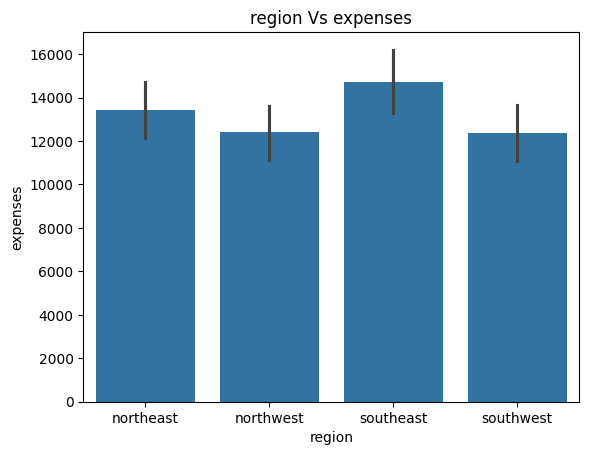

In [ ]:
sns.barplot(x=insured['region'],y=insured.expenses).set(title='region Vs expenses')

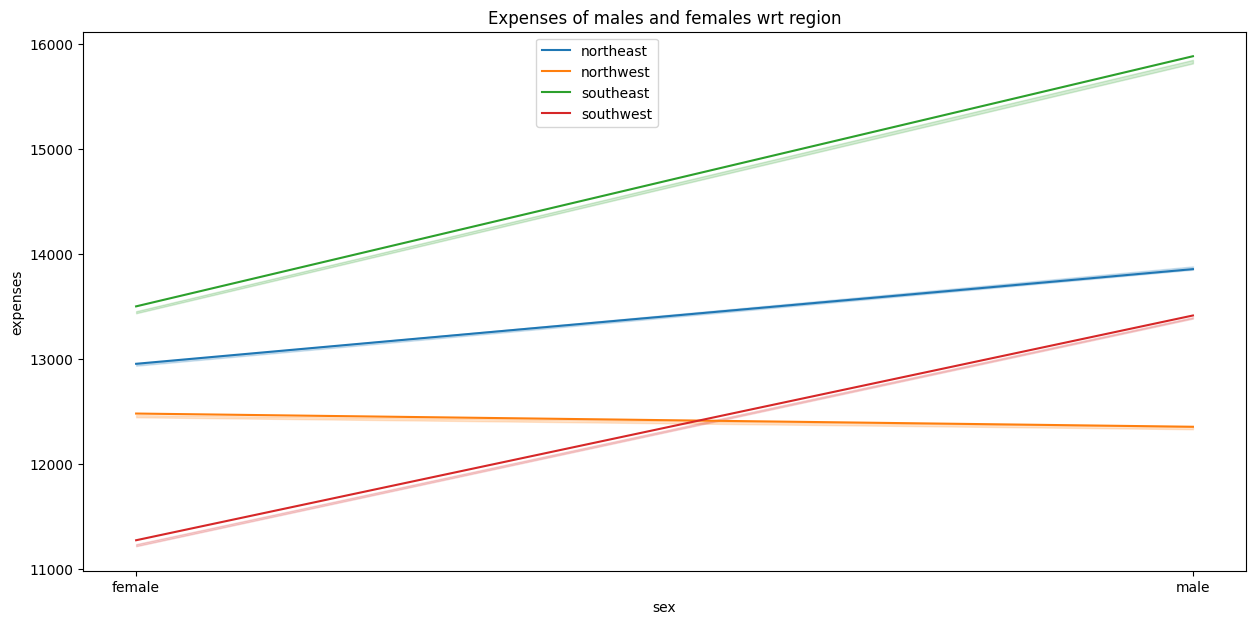

In [ ]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["sex"], y =insured["expenses"],hue=insured["region"],ci=1).set(title= 'Expenses of males and females wrt region')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

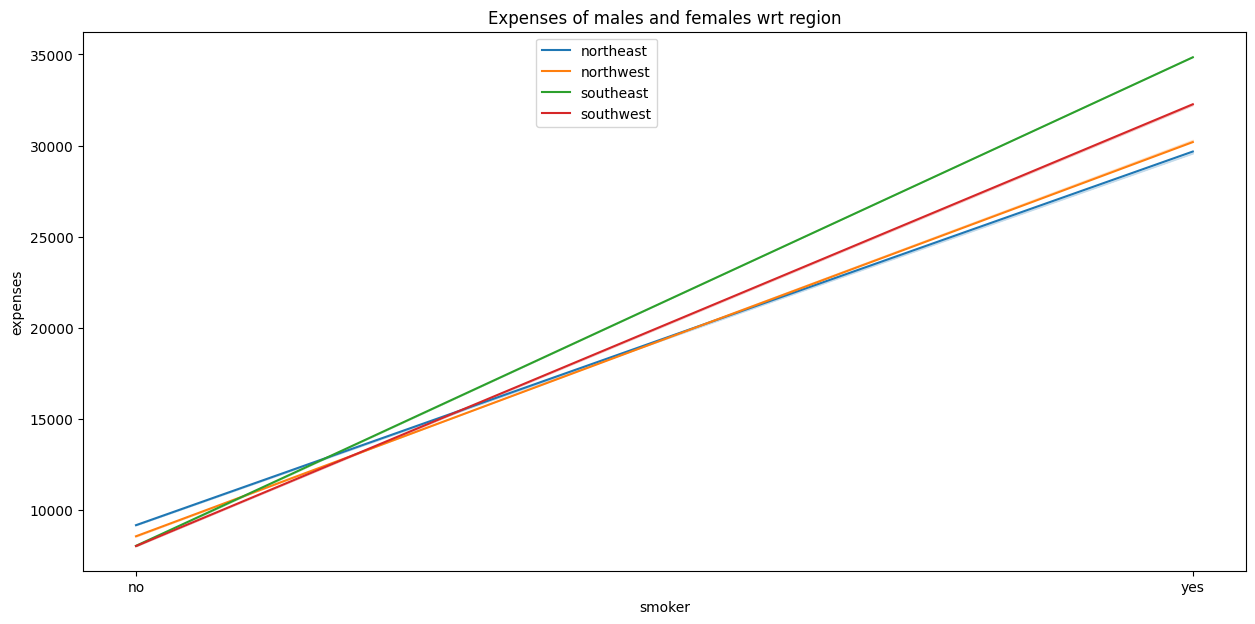

In [ ]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["smoker"], y =insured["expenses"],hue=insured["region"],ci=1).set(title= 'Expenses of males and females wrt region')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

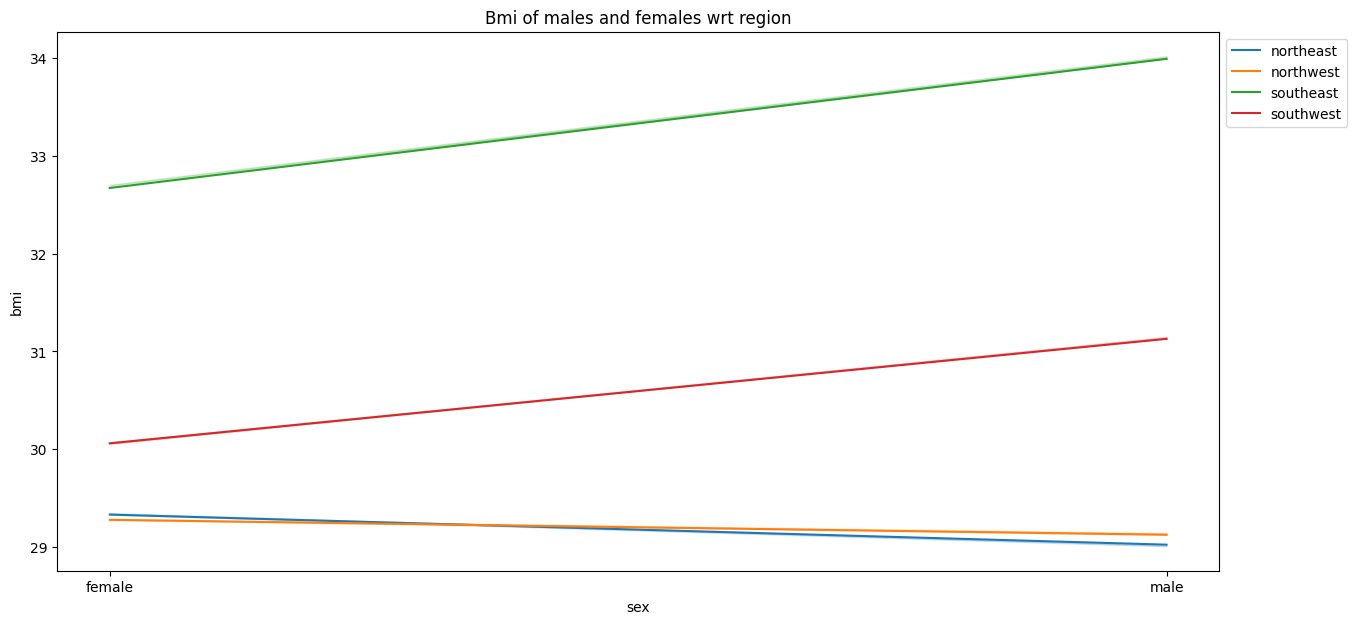

In [ ]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["sex"], y =insured["bmi"],hue=insured["region"],ci=1).set(title= 'Bmi of males and females wrt region')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
#Cross tab
edu_gender_salary =pd.crosstab(index=insured['region'], columns=insured.sex  , values=insured.expenses, aggfunc='mean')
edu_gender_salary



sex,female,male
region,,
northeast,12953.203106,13854.005767
northwest,12479.870244,12354.119317
southeast,13499.669257,15879.617354
southwest,11274.411667,13412.884233


In [ ]:
gender_edu_salary=pd.crosstab(index=insured.sex, columns=insured['region']  , values=insured.expenses,aggfunc='sum')
gender_edu_salary

region,northeast,northwest,southeast,southwest
sex,,,,
female,2085465.70,2046698.72,2362442.12,1826454.69
male,2258202.94,1989013.21,3001247.68,2186300.13


In [ ]:
# plot directly from dataframe

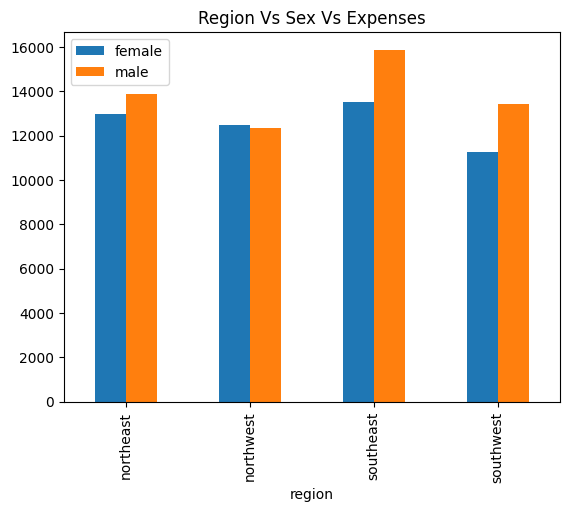

In [ ]:
edu_gender_salary.plot(kind='bar',title="Region Vs Sex Vs Expenses")
plt.legend(loc='upper left')
plt.show()

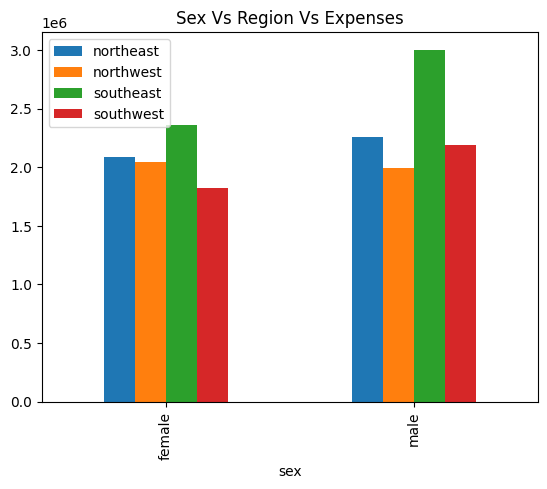

In [ ]:
gender_edu_salary.plot(kind='bar',title="Sex Vs Region Vs Expenses")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# converting quantitative data to qualitative
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
#creating groups of age
category = pd.cut(insured.age,bins=[15,20,25,30,35,40,45,50,55,60,65],labels=['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65'])
insured.insert(1,'AgeGroup',category)
#category

In [ ]:
insured

,age,AgeGroup,sex,bmi,children,smoker,region,expenses
0,19,15-20,female,27.9,0,yes,southwest,16884.92
1,18,15-20,male,33.8,1,no,southeast,1725.55
2,28,25-30,male,33.0,3,no,southeast,4449.46
3,33,30-35,male,22.7,0,no,northwest,21984.47
4,32,30-35,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1333,50,45-50,male,31.0,3,no,northwest,10600.55
1334,18,15-20,female,31.9,0,no,northeast,2205.98
1335,18,15-20,female,36.9,0,no,southeast,1629.83
1336,21,20-25,female,25.8,0,no,southwest,2007.95


In [ ]:
age_group = insured.groupby(insured.AgeGroup).expenses.mean()
age_group

AgeGroup
15-20     8713.482771
20-25     9529.919643
25-30    10086.132754
30-35    10929.364692
35-40    12366.023071
40-45    14538.651241
45-50    15013.603472
50-55    16988.005500
55-60    17145.495040
60-65    21063.163407
Name: expenses, dtype: float64

In [ ]:
age_bin_cat.plot(kind='bar',title="Age_bins vs Avg Salary")

NameError: name 'age_bin_cat' is not defined

In [ ]:
age_group = insured.AgeGroup.value_counts()
age_group

In [ ]:
category1=pd.cut(insured['bmi'],bins=[15,20,25,30,35,40,45,50,55],labels=['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55'])
insured.insert(2,'bmi_group',category1)

In [ ]:
insured.head()

In [ ]:
age_group = insured.AgeGroup.value_counts()
age_group.plot(kind='bar',title="Agebins Count Plot")
plt.show()

In [ ]:
bmi_bin_cat = insured.groupby(insured.bmi).expenses.mean()
bmi_bin_cat

In [ ]:
Exp_bin_cat.plot(kind='bar',title="Exp_bins vs Avg Salary")


In [ ]:
#multi variate data analysis
insured.groupby(['sex','smoker','region']).expenses.mean()

In [ ]:
insured.groupby(['sex','smoker','region']).expenses.mean().unstack()

In [ ]:
insured.groupby(['sex','smoker','region']).expenses.mean().unstack().plot(kind='bar',title="Sex vs smoker vs region")

In [ ]:
#plt.figure(figsize=(15,7))
#sns.barplot(x=insured["Education Level"],y=insured["Salary"],hue=insured['Gender'],ci=0).set(title= 'Age and Bmi of Males and Females')
#plt.legend(bbox_to_anchor=(1.00, 1))
#plt.show()

In [ ]:
#sns.barplot(x='Education Level',y='expenses',hue='sex',data=insured).set(title="Fig 2:BMI group and Charges " )

In [ ]:
sns.relplot(x=insured['expenses'], y=insured["age"], hue=insured['sex'], size=  insured['region'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Expenses vs Sex vs Region');

In [ ]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(insured, x="children", y="expenses",
	         size="bmi", color="sex",
                 hover_name="smoker", log_x=True, size_max=30)
fig.show()

In [ ]:
insured

In [ ]:
sns.relplot(x=insured['Salary'], y=insured['Years of Experience'], hue=insured['Gender'], size=  insured['Education Level'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Salary by Education Level,Gender,Experience');

# Statistical Analysis

# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

<div class ="alert alert-block alert-info">

---


    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  :  \mu_1 <= \mu_2  $ The average charges of smokers is less than or equal to nonsmokers
 <br>


$\ H_a  :\mu_1 > \mu_2 $ The average charges of smokers is greater than nonsmokers  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify the test</b></font>

Standard deviation of the population is not known  ,will perform a T stat test .  The > sign in alternate hypothesis indicate  test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of  sampling  distribution curve.

    


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

,age,AgeGroup,sex,bmi,children,smoker,region,expenses
0,19,15-20,female,27.9,0,yes,southwest,16884.92
11,62,60-65,female,26.3,0,yes,southeast,27808.73
14,27,25-30,male,42.1,0,yes,southeast,39611.76
19,30,25-30,male,35.3,0,yes,southwest,36837.47
23,34,30-35,female,31.9,1,yes,northeast,37701.88


In [ ]:
smoker.count()

age         274
AgeGroup    274
sex         274
bmi         274
children    274
smoker      274
region      274
expenses    274
dtype: int64

In [ ]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

,age,AgeGroup,sex,bmi,children,smoker,region,expenses
1,18,15-20,male,33.8,1,no,southeast,1725.55
2,28,25-30,male,33.0,3,no,southeast,4449.46
3,33,30-35,male,22.7,0,no,northwest,21984.47
4,32,30-35,male,28.9,0,no,northwest,3866.86
5,31,30-35,female,25.7,0,no,southeast,3756.62


In [ ]:
nonsmoker.count()

age         1064
AgeGroup    1064
sex         1064
bmi         1064
children    1064
smoker      1064
region      1064
expenses    1064
dtype: int64

In [ ]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[0:274]


In [ ]:
charges_yes = smoker.expenses
charges_no = nonsmoker.expenses

In [ ]:
print(f'Average Cost charged to Insurance for smoker is {charges_yes.mean()} and nonsmoker is {charges_no.mean()} ')


Average Cost charged to Insurance for smoker is 32050.23197080292 and nonsmoker is 8460.786167883212 


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

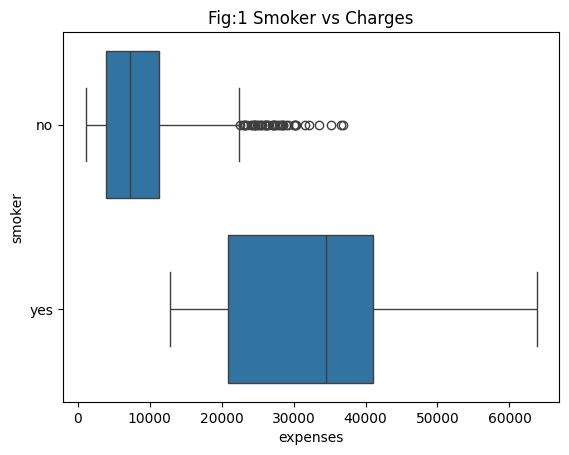

In [ ]:
#smoker vs charges
sns.boxplot(x=insured.expenses,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [ ]:
charges_no

1       1725.55
2       4449.46
3      21984.47
4       3866.86
5       3756.62
         ...   
350    11830.61
351     8932.08
352     3554.20
353    12404.88
354    14133.04
Name: expenses, Length: 274, dtype: float64

In [ ]:
alpha = 0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))


Test statistic = 29.96693762930951 , Pvalue =2.11900162618799e-117 , OnetailPvalue = 1.059500813093995e-117


In [ ]:
if p_value_1 < alpha :
    print(f"Conclusion:Since P value {p_value_onetail} is less than alpha {alpha} " )
    # print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    print("Reject Null Hypothesis")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    # print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")
    print("Failed to Reject Null Hypothesis")

Conclusion:Since P value 1.059500813093995e-117 is less than alpha 0.05 
Reject Null Hypothesis


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide whethere to  reject or failed to reject null hypothesis</b></font><br>    
    We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges

# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

<div class ="alert alert-block alert-info">
    Let $\mu_1 \mu_2 $ and be the respective population means for BMI of males and BMI of females<br>
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  : \mu_1 - \mu_2 = 0$ There is no difference between the BMI of Male  and BMI of female.<br>
$\ H_a  : \mu_1 - \mu_2 !=0 $ There is difference between the BMI of Male and BMI of female. <br>


</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3:Identify the test</b></font><br>Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
#get all observation for male.
df_male=insured.loc[insured.sex=="male"]
#get all observation for females
df_female=insured.loc[insured.sex=="female"]


In [ ]:
#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

<Axes: xlabel='bmi', ylabel='Density'>

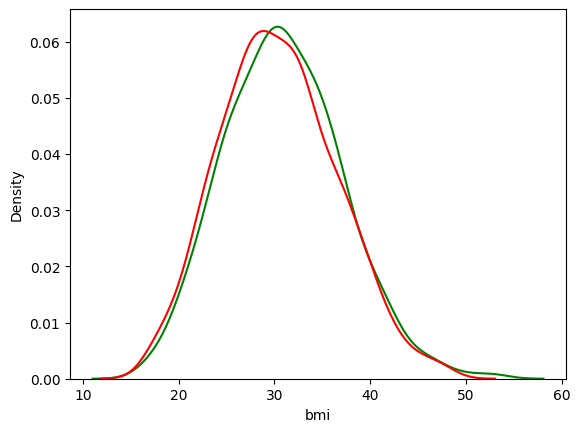

In [ ]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)


In [ ]:
df_female.bmi.mean()

30.3797583081571

In [ ]:
df_male.bmi.mean()

30.94526627218935

In [ ]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

tstats =  1.6970846764986391 , pvalue =  0.08991356987176295


In [ ]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")


Conclusion:Since P value 0.08991356987176295 is greater than alpha 0.05 
Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male.

### Recommendation
- Based on EDA and statistical  evidence it can be seen that  customer who smoke or   have higher  BMI  have more higher claims. We can encourage customers to quit smoking by providing them  incentive points  for talking to life coach, get help for improving lifestyle habits,  Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
- We can have Active wellness programs which can help up reduce claims related to BMI.
- High BMI  is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
- Provide discount coupons  for Gym  or  fitness devices encouraging customers to exercise.
